In [0]:
import numpy as np
import time
import cv2
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from google.colab import drive
from google.colab import files
from keras.preprocessing import image
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
labelsPath = "/content/drive/My Drive/Colab Notebooks/coco.names"
LABELS = open(labelsPath).read().strip().split("\n")

In [0]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [0]:
weightsPath = "/content/drive/My Drive/Colab Notebooks/yolov3.weights"
configPath = "/content/drive/My Drive/Colab Notebooks/yolov3.cfg"

In [0]:
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  pathh = '/content/' + fn
  image =cv2.imread(pathh)
  (H, W) = image.shape[:2]
  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  layerOutputs = net.forward(ln)
  end = time.time()
  print("Frame Prediction Time : {:.6f} seconds".format(end - start))
  boxes = []
  confidences = []
  classIDs = []
  for output in layerOutputs:
      for detection in output:
          scores = detection[5:]
          classID = np.argmax(scores)
          confidence = scores[classID]
          if confidence > 0.5 and classID == 0:
              box = detection[0:4] * np.array([W, H, W, H])
              (centerX, centerY, width, height) = box.astype("int")
              x = int(centerX - (width / 2))
              y = int(centerY - (height / 2))
              boxes.append([x, y, int(width), int(height)])
              confidences.append(float(confidence))
              classIDs.append(classID)
              
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.3)
  ind = []
  for i in range(0,len(classIDs)):
      if(classIDs[i]==0):
          ind.append(i)
  a = []
  b = []
  color = (0,255,0) 
  if len(idxs) > 0:
          for i in idxs.flatten():
              (x, y) = (boxes[i][0], boxes[i][1])
              (w, h) = (boxes[i][2], boxes[i][3])
              a.append(x)
              b.append(y)
              cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

Saving test_im.jfif to test_im (1).jfif
Frame Prediction Time : 2.499408 seconds


In [0]:
distance=[] 
nsd = []
ct=0
dt=0
for i in range(0,len(a)-1):
    for k in range(1,len(a)):
        if(k==i):
            break
        else:
            x_dist = (a[k] - a[i])
            y_dist = (b[k] - b[i])
            d = math.sqrt(x_dist * x_dist + y_dist * y_dist)
            distance.append(d)
            if(d<=100.0):
                nsd.append(i)
                nsd.append(k)
                ct+=1
            else:
              dt+=1
            nsd = list(dict.fromkeys(nsd))
            

In [0]:
color = (0, 0, 255) 
for i in nsd:
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    text = "Alert"
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

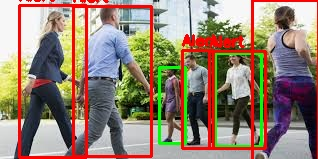

4 out of 11 people are found not following social distancing


In [0]:
cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
Image('image.jpg')
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/output.jpg', image)
display(Image('/content/drive/My Drive/Colab Notebooks/output.jpg'))
print(ct,"out of",dt+ct,"people are found not following social distancing")